# Cryptocurrency Clusters Machine Learning

## Data Preparation

In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
# Read crypto_data.csv into Pandas
# The dataset was obtained from: https://min-api.cryptocompare.com/data/all/coinlist
file = Path('Resources/crypto_data.csv')
df = pd.read_csv(file)
df.head(5)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
# Discard all cryptocurrencies that are not being traded and drop the IsTrading column from the dataframe
df = df[df.IsTrading != False]
df = df.drop(['IsTrading'], axis=1)
df.head(5)

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [4]:
# Remove all rows that have at least one null value
df = df.dropna()
df.head(5)

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [5]:
# Filter for cryptocurrencies that have been mined (the total coins mined should be greater than zero)
df = df[df.TotalCoinSupply.astype(float) > 0]
df.head(5)

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
9,LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000


In [6]:
# Delete the CoinName from the original dataframe
df = df.drop(['CoinName'], axis=1)
df = df.drop(df.columns[0], axis=1)
df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
9,Scrypt,PoW,6.303924e+07,84000000
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [7]:
# Convert Algorithm and ProofType into numerical data
# Use Pandas to create dummy variables
# Examine the number of rows and columns of your dataset now. How did they change?
df = pd.get_dummies(df, prefix=['Algorithm', 'ProofType'], columns=['Algorithm', 'ProofType'])
df

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,6.303924e+07,84000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Changes:
The number of rows remained the same after adding dummy variables, but the number of columns increased by 101 

In [8]:
# Format all data as numeric
df.apply(pd.to_numeric)
df

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,6.303924e+07,84000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Standardize the dataset so columns that contain larger values do not unduly influence the outcome
scaled_data = StandardScaler().fit_transform(df)
scaled_data

array([[-0.09782131, -0.03965512, -0.03965258, ..., -0.03965258,
        -0.03965258, -0.03965258],
       [-0.07228807, -0.03965497, -0.03965258, ..., -0.03965258,
        -0.03965258, -0.03965258],
       [ 0.61067897, -0.03956909, -0.03965258, ..., -0.03965258,
        -0.03965258, -0.03965258],
       ...,
       [-0.074102  , -0.03965474, -0.03965258, ..., -0.03965258,
        -0.03965258, -0.03965258],
       [-0.09764475, -0.03965511, -0.03965258, ..., -0.03965258,
        -0.03965258, -0.03965258],
       [-0.09781821, -0.03965512, -0.03965258, ..., -0.03965258,
        -0.03965258, -0.03965258]])

## Dimensionality Reduction

In [12]:
# Perform dimensionality reduction with PCA (preserve 90% of the explained variance)
pca = PCA(n_components=0.90)
pca_data = pca.fit_transform(scaled_data)
df_pca_data = pd.DataFrame(data=pca_data, columns=['pca_%i' % i for i in range(len(pca_data[0]))])
df_pca_data

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,pca_70,pca_71,pca_72,pca_73,pca_74,pca_75,pca_76,pca_77,pca_78,pca_79
0,-0.160261,-1.182885,-0.550083,-4.156269e-07,2.858864e-10,1.361659e-10,8.578712e-09,-1.902726e-10,0.015750,-1.162458,...,6.533448e-13,-9.598572e-13,8.846444e-14,1.201962e-12,-6.699613e-13,-6.356726e-13,2.804860e-13,1.258562e-12,-2.943425e-13,-2.804197e-13
1,-0.145856,-1.180922,-0.550503,-4.156270e-07,2.858866e-10,1.361658e-10,8.578713e-09,-1.902729e-10,0.014381,-1.164725,...,6.530216e-13,-9.597216e-13,8.843016e-14,1.201752e-12,-6.698586e-13,-6.361119e-13,2.806014e-13,1.258482e-12,-2.943870e-13,-2.805683e-13
2,0.406774,-1.934732,-0.622302,-5.915961e-07,4.069398e-10,1.938235e-10,1.221079e-08,-2.708379e-10,-0.029898,-0.753670,...,6.277487e-14,1.552234e-14,-3.297799e-14,4.676980e-14,2.302716e-14,8.673267e-15,4.429586e-14,-1.184729e-13,3.550264e-14,7.737694e-14
3,-0.246677,1.406204,0.188435,2.214516e-07,-1.523316e-10,-7.255515e-11,-4.570870e-09,1.013844e-10,-0.011565,0.155303,...,4.874793e-15,5.809469e-15,-6.058708e-15,6.968165e-15,6.153511e-15,-8.051656e-15,8.347884e-15,-2.100712e-14,7.438247e-15,1.425946e-14
4,-0.318125,1.058161,-0.011589,1.120913e-07,-7.711347e-11,-3.672943e-11,-2.313634e-09,5.132239e-11,0.007188,-0.363163,...,6.550656e-13,-9.602281e-13,8.737372e-14,1.203394e-12,-6.678688e-13,-6.348620e-13,2.803218e-13,1.255471e-12,-2.944379e-13,-2.782496e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,4.330349,0.301908,-0.119242,-1.156813e-07,7.955856e-11,3.789532e-11,2.387684e-09,-5.294823e-11,-1.044660,0.619719,...,1.734688e-15,1.039401e-14,-6.607160e-15,6.257383e-15,1.200682e-14,-8.964664e-15,5.780711e-15,-3.095545e-14,9.615972e-15,1.439461e-14
633,-0.160057,-1.182857,-0.550089,-4.156269e-07,2.858865e-10,1.361659e-10,8.578712e-09,-1.902729e-10,0.015731,-1.162490,...,6.535040e-13,-9.598505e-13,8.849546e-14,1.201690e-12,-6.696563e-13,-6.360997e-13,2.808902e-13,1.258531e-12,-2.941527e-13,-2.803624e-13
634,-0.201116,2.218903,0.376254,4.316764e-07,-2.969406e-10,-1.414318e-10,-8.910000e-09,1.976293e-10,-0.010967,0.112984,...,-8.499466e-15,-5.207359e-15,-1.686920e-14,-1.499800e-14,4.259581e-15,-1.857636e-14,3.236024e-14,-7.528276e-14,2.303320e-14,3.093224e-14
635,-0.343673,1.923417,0.336221,3.712768e-07,-2.553923e-10,-1.216427e-10,-7.663330e-09,1.699765e-10,0.008728,0.255941,...,6.515002e-13,-9.676587e-13,9.104373e-14,1.197123e-12,-6.617392e-13,-6.273027e-13,2.837750e-13,1.257477e-12,-2.908421e-13,-2.735021e-13


### Changes:
The number of rows remained the same after performing dimensionality reduction with PCA, but the number of columns decreased from 105 to 80, decreasing by 25 columns. 

In [35]:
# Further reduce the dataset dimensions with t-SNE
# Run t-SNE on the principal components: the output of the PCA transformation
tsne = TSNE(learning_rate=800)
tsne_features = tsne.fit_transform(df_pca_data)
tsne_features.shape

(637, 2)

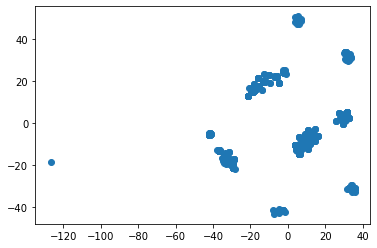

In [36]:
# Create a scatter plot of the t-SNE output (observe whether there are distinct clusters or not)
df_tsne_pca_data = df_pca_data
df_tsne_pca_data['x'] = tsne_features[:,0]
df_tsne_pca_data['y'] = tsne_features[:,1]
plt.scatter(df_tsne_pca_data['x'], df_tsne_pca_data['y'])
plt.show()

## Cluster Analysis with k-Means

In [39]:
# Use a for-loop to determine the inertia for each k between 1 through 10
inertia = []
k = list(range(1,11))
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_tsne_pca_data)
    inertia.append(km.inertia_)
elbow_data = {'k': k, 'inertia': inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

C:\Users\josep\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,796543.777325
1,2,508595.998910
2,3,304372.247264
3,4,226469.781955
4,5,164709.999728
5,6,140875.199353
6,7,106436.186816
7,8,82634.052611
8,9,76150.572044
9,10,67134.323167


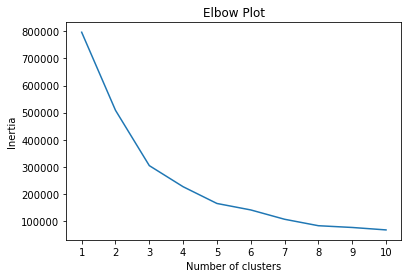

In [40]:
# Create an elbow plot to identify the best number of clusters
# Determine, if possible, where the elbow of the plot is, and at which value of k it appears
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

## Recommendation